In [1]:
! pip install -q langgraph langchain-community langchain-core langchain-groq

In [2]:
from langgraph.graph import MessagesState
from langchain_groq import ChatGroq
from langgraph.graph import START, END, StateGraph
from langchain_core.messages import SystemMessage
from google.colab import userdata

import os

In [3]:
# Retrieve API keys from Google Colab environment
GROQ_API_KEY = userdata.get('GROQ_API_KEY')

# Set API keys as environment variables
os.environ['GROQ_API_KEY'] = GROQ_API_KEY

In [4]:
llm = ChatGroq(model="qwen-2.5-32b")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7b48bd0e9150>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7b48bcdbb010>, model_name='qwen-2.5-32b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [5]:
builder = StateGraph(MessagesState)
builder

In [6]:
def title_generator(state:MessagesState):

  title_system_prompt = SystemMessage(
    '''
    Generate a compelling and SEO-friendly blog title. The title should be engaging, clear, and optimized for reader interest. Aim for a balance between creativity and clarity.
    '''
)

  return {"messages":[llm.invoke([title_system_prompt] + state["messages"])]}

In [7]:
def blog_generator(state:MessagesState):

  blog_system_prompt = SystemMessage(
'''
Write a detailed and engaging blog post. The blog should be well-structured with an introduction, key insights, and a conclusion. It should be informative, engaging, and optimized for SEO. Use a professional yet conversational tone. Include relevant examples, statistics, and actionable takeaways where applicable. Ensure readability with short paragraphs, subheadings, and bullet points.
'''
 )


  return {"messages":[llm.invoke([blog_system_prompt] + state["messages"])]}

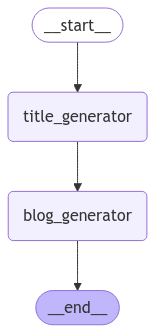

In [8]:
builder.add_node("title_generator",title_generator)
builder.add_node("blog_generator",blog_generator)

builder.add_edge(START,"title_generator")
builder.add_edge("title_generator","blog_generator")
builder.add_edge("blog_generator",END)

graph = builder.compile()
graph

In [15]:
topic = "machine learning"
messages = graph.invoke({"messages":topic})
for m in messages["messages"]:
  m.pretty_print()

================================ Human Message =================================

machine learning
================================== Ai Message ==================================

"Unlocking the Future: How Machine Learning is Revolutionizing the Tech World"
================================== Ai Message ==================================

### Unlocking the Future: How Machine Learning is Revolutionizing the Tech World

In the rapidly evolving landscape of technology, one area stands out as a game-changer: Machine Learning (ML). This subset of artificial intelligence (AI) is not just a buzzword but a transformative force reshaping industries, from healthcare to finance, and everything in between. In this blog post, we’ll dive into the basics of machine learning, explore its key insights, and uncover how it's making a tangible impact on our daily lives.

#### What is Machine Learning?

Machine Learning is a method of data analysis that automates analytical model building. It is based on